In [2]:
import pandas as pd
from IPython.core.display import display
from pandas import Series,DataFrame
import numpy as np

In [3]:
#分组聚合分为三部分 拆分-应用-合并 split-apply-combine
#数据根据所提供的一个活多个键被分为多组
#然后在每个组内应用函数方法得到新值
#最终再进行合并

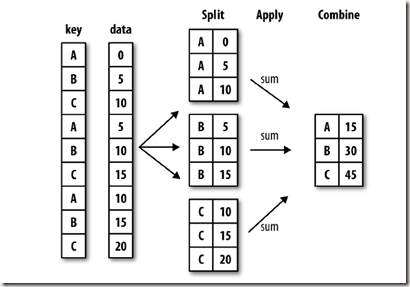

In [4]:
from PIL import Image
img = Image.open('groupby.png')
display(img)
#如该图所示

In [5]:
df = DataFrame({'key1':['a','a','b','b','a'],
                'key2':['one','two','one','two','one'],
                'data1':np.random.randn(5),
                'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-1.296567,-0.224583
1,a,two,0.003291,-1.663326
2,b,one,0.038248,-0.059624
3,b,two,0.284589,0.116917
4,a,one,-0.276273,-0.519105


In [6]:
#如果要按照key1进行分组 计算data1的平均值：
grouped = df['data1'].groupby(df['key1'])
grouped
#值得注意的是groupby之后的对象是一个groupby类型的变量 （很难受不是吗？太难受了！）

In [7]:
print(type(grouped.mean()))
grouped.mean()

#就是拆分-应用-合并
#按照key1的值拆分 拆分成a,b 然后对于a和b里面的每个组都求均值 最后合并为a b key一个Series

<class 'pandas.core.series.Series'>


key1
a   -0.523183
b    0.161418
Name: data1, dtype: float64

In [8]:
grouped1 = df.groupby(df['key1'])['data1']
grouped1.mean()

key1
a   -0.523183
b    0.161418
Name: data1, dtype: float64

In [9]:
means = df['data1'].groupby([df['key1'],df['key2']]).mean()
means

#groupby传入两列作为参数 则会按照两列进行拆分

key1  key2
a     one    -0.786420
      two     0.003291
b     one     0.038248
      two     0.284589
Name: data1, dtype: float64

In [10]:
means.unstack()
#不叠就是铺开 变成DataFrame

key2,one,two
key1,,
a,-0.786420,0.003291
b,0.038248,0.284589


In [11]:
states = np.array(['Ohio','California','California','Ohio','Ohio'])
years = np.array([2005,2005,2006,2005,2006])

In [12]:
df['data1'].groupby([states,years]).mean()
#非常神奇
#分组键是一个二维数组 用他们分组split 分到了index上 之后进行的apply-combine

California  2005    0.003291
            2006    0.038248
Ohio        2005   -0.505989
            2006   -0.276273
Name: data1, dtype: float64

In [13]:
df.groupby('key1').mean()
#值的注意的是在此操作之后，key2列不见了
#因为key2列不是数值数据（麻烦列） 所以会被结果排除
#默认情况下 所有数值列被聚合

,data1,data2
key1,,
a,-0.523183,-0.802338
b,0.161418,0.028647


In [14]:
df.groupby(['key1','key2']).size()
#使用size可以获得spilt之后的分组情况（很有用）

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [15]:
for name,group in df.groupby('key1'):
    print(name)
    print('-------')
    print(group)
    print('########')
#可以通过循环迭代获得二元元组（第一个是分组名name 第二个是同一分组名的数据块）

a
-------
  key1 key2     data1     data2
0    a  one -1.296567 -0.224583
1    a  two  0.003291 -1.663326
4    a  one -0.276273 -0.519105
########
b
-------
  key1 key2     data1     data2
2    b  one  0.038248 -0.059624
3    b  two  0.284589  0.116917
########


In [16]:
for (k1,k2),group in df.groupby(['key1','key2']):
    print(k1,k2)
    print('------------')
    print(group)
    print('############')
#如果是按照多个键进行split的，得到的第一个参数同样变成多维的 是一个多维的对

a one
------------
  key1 key2     data1     data2
0    a  one -1.296567 -0.224583
4    a  one -0.276273 -0.519105
############
a two
------------
  key1 key2     data1     data2
1    a  two  0.003291 -1.663326
############
b one
------------
  key1 key2     data1     data2
2    b  one  0.038248 -0.059624
############
b two
------------
  key1 key2     data1     data2
3    b  two  0.284589  0.116917
############


In [17]:
print(list(df.groupby('key1')))

[('a',   key1 key2     data1     data2
0    a  one -1.296567 -0.224583
1    a  two  0.003291 -1.663326
4    a  one -0.276273 -0.519105), ('b',   key1 key2     data1     data2
2    b  one  0.038248 -0.059624
3    b  two  0.284589  0.116917)]


In [18]:
piece = dict(list(df.groupby('key1')))
print(piece)
print(piece['a'])
print(type(piece['a']))
#如果对groupby的对象进行list操作，每个位置都是一个对的形式
#键就是上面说的键或者键对 值就是数据
#dict list之后的对象可以变为一个字典
#字典的索引是键 值是数据 此样例中还是DataFrame

{'a':   key1 key2     data1     data2
0    a  one -1.296567 -0.224583
1    a  two  0.003291 -1.663326
4    a  one -0.276273 -0.519105, 'b':   key1 key2     data1     data2
2    b  one  0.038248 -0.059624
3    b  two  0.284589  0.116917}
  key1 key2     data1     data2
0    a  one -1.296567 -0.224583
1    a  two  0.003291 -1.663326
4    a  one -0.276273 -0.519105
<class 'pandas.core.frame.DataFrame'>


In [19]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [20]:
grouped2 = df.groupby(df.dtypes,axis=1)
grouped2.size()

float64    2
object     2
dtype: int64

In [21]:
print(dict(list(grouped2)))

{dtype('float64'):       data1     data2
0 -1.296567 -0.224583
1  0.003291 -1.663326
2  0.038248 -0.059624
3  0.284589  0.116917
4 -0.276273 -0.519105, dtype('O'):   key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one}


In [22]:
df.groupby('key1')['data1'].size()

key1
a    3
b    2
Name: data1, dtype: int64

In [23]:
df['data1'].groupby(df['key1']).size()

#上面两个是一样的

key1
a    3
b    2
Name: data1, dtype: int64

In [24]:
df.groupby(['key1','key2'])[['data1','data2']].mean()
#这样的方法似乎更合理？
#groupby的参数是要聚合的对象 后面的取值是需要列出的数据列

data1     data2
key1 key2                    
a    one  -0.786420 -0.371844
     two   0.003291 -1.663326
b    one   0.038248 -0.059624
     two   0.284589  0.116917

In [25]:
print(df.groupby(['key1','key2'])[['data2']].mean())
print(type(df.groupby(['key1','key2'])[['data2']].mean()))
print('------------')
print(df.groupby(['key1','key2'])['data2'].mean())
print(type(df.groupby(['key1','key2'])['data2'].mean()))
#值的注意的是 如果后面的取值部分使用数组 则得到的结果是一个DataFrame
#而如果后面取值部分用一个值，则得到的结果是Series


              data2
key1 key2          
a    one  -0.371844
     two  -1.663326
b    one  -0.059624
     two   0.116917
<class 'pandas.core.frame.DataFrame'>
------------
key1  key2
a     one    -0.371844
      two    -1.663326
b     one    -0.059624
      two     0.116917
Name: data2, dtype: float64
<class 'pandas.core.series.Series'>


In [26]:
people = DataFrame(np.random.randn(5,5),
                   columns=['a','b','c','d','e'],
                   index=['Joe','Steve','Wes','Jim','Travis'])
people

,a,b,c,d,e
Joe,-0.744043,0.261516,0.601362,-0.182068,0.980535
Steve,1.759451,-0.571339,-1.205692,-1.353221,-0.000605
Wes,-1.307497,0.745112,0.104205,-0.919542,1.525525
Jim,-0.441063,1.356305,1.586446,-0.371197,0.384057
Travis,-1.266596,-1.013258,0.490134,0.823774,0.985179


In [27]:
#通过字典进行分组
mapping = {'a':'red','b':'red','c':'blue','d':'blue','e':'red','f':'orange'}

by_columns = people.groupby(mapping,axis=1)
by_columns.sum()
#通过字典进行分组就是将映射后的内容进行分组 在进行apply-combine combine的结果是映射后的内容

,blue,red
Joe,0.419294,0.498008
Steve,-2.558913,1.187507
Wes,-0.815336,0.963140
Jim,1.215249,1.299299
Travis,1.313909,-1.294675


In [28]:
map_Series = Series(mapping)
map_Series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [29]:
people.groupby(map_Series,axis=1).count()
#道理同字典的道理 不过参数换成Series 但是似乎变得就不太好理解了
#所以按照Series分组可以通过字典去思考

,blue,red
Joe,2,3
Steve,2,3
Wes,2,3
Jim,2,3
Travis,2,3


In [30]:
#字典是一种映射关系
#同理函数也是一种映射关系 所以可以通过函数作为参数进行分组
people.groupby(len).sum()
#此时groupby的参数是一个函数
#通过映射关系只是在分组之前将不同对象进行了操作 使得他们按照要求进行后续的分组

print('********************************************')
#值的注意的是 如果只是用函数方法 字典等 默认是对index进行的映射
print('********************************************')

,a,b,c,d,e
3,-2.492603,2.362932,2.292014,-1.472807,2.890117
5,1.759451,-0.571339,-1.205692,-1.353221,-0.000605
6,-1.266596,-1.013258,0.490134,0.823774,0.985179


In [31]:
key_list = ['one','one','one','two','two']
people.groupby([len,key_list]).min()
#二维的只是多饶了个弯 道理是相同的 第一个len将index变为了[3,5,3,3,6] 之后和第二个参数结合
#第二个参数和index结合 对应变为了one one one two two
#此时二者组合变为了[(3,one),(5,one),(3,one),(3,two),(6,two)]
#之后进行的聚合

#所以不同的聚合方法如函数 字典 列表 Series等都是可以混用的 最终的结果都是变成对形式 再进行聚合

a         b         c         d         e
3 one -1.307497  0.261516  0.104205 -0.919542  0.980535
  two -0.441063  1.356305  1.586446 -0.371197  0.384057
5 one  1.759451 -0.571339 -1.205692 -1.353221 -0.000605
6 two -1.266596 -1.013258  0.490134  0.823774  0.985179

In [32]:
columns = pd.MultiIndex.from_arrays([['US','US','US','JP','JP'],
                                     [1,3,5,1,3]],names=['cty','tenor'])
hier_df = DataFrame(np.random.randn(4,5),columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -0.398491 -0.794686  0.861486 -0.774991 -0.208596
1      0.563810 -0.083022  0.055300  1.921768  1.334229
2      0.311008 -0.754181  2.428792  3.106819  1.770884
3      0.073639 -0.310244  1.153263  0.853664 -0.949796

In [33]:
hier_df.groupby(level='cty',axis=1).count()
#通过level参数进行索引级别的聚合

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [41]:
print(df)
grouped3 = df.groupby('key1')
print(grouped3.size())
print(grouped3.mean())
grouped3['data1'].quantile(0.9)
#groupby本身没有quantile方法而且quantile方法本是作用于Series上的 这就很有趣了
#在groupby之后调用了以Series为对象的方法 就是对groupby对象切片为多个Series分别处理的效果

  key1 key2     data1     data2
0    a  one -1.296567 -0.224583
1    a  two  0.003291 -1.663326
2    b  one  0.038248 -0.059624
3    b  two  0.284589  0.116917
4    a  one -0.276273 -0.519105
key1
a    3
b    2
dtype: int64
         data1     data2
key1                    
a    -0.523183 -0.802338
b     0.161418  0.028647


key1
a   -0.052621
b    0.259955
Name: data1, dtype: float64

In [40]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped3.agg(peak_to_peak)
#使用自己定义的聚合函数 传入agg方法中
#这个其实和mean()的概念是一样的，因为是对数值做的运算，所以将key2列去掉了

,data1,data2
key1,,
a,1.299859,1.438743
b,0.246341,0.176542


In [42]:
grouped3.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0 -0.523183  0.684202 -1.296567 -0.786420 -0.276273 -0.136491   
b      2.0  0.161418  0.174190  0.038248  0.099833  0.161418  0.223004   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     0.003291   3.0 -0.802338  0.760040 -1.663326 -1.091215 -0.519105   
b     0.284589   2.0  0.028647  0.124834 -0.059624 -0.015489  0.028647   

                          
           75%       max  
key1                      
a    -0.371844 -0.224583  
b     0.072782  0.116917

In [43]:
tips = pd.read_csv('../examples/tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [44]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [49]:
grouped_tips = tips.groupby(['smoker'])
grouped_pct = grouped_tips['tip_pct']
grouped_pct.mean()
#此方法是之前说过的使用以Series为对象的方法

smoker
No     0.159328
Yes    0.163196
Name: tip_pct, dtype: float64

In [51]:
grouped_pct.agg('mean')
#正常情况下应该是使用agg调用方法的

smoker
No     0.159328
Yes    0.163196
Name: tip_pct, dtype: float64

In [52]:
grouped_pct.agg(['mean','std',peak_to_peak])
#同时 也可以使用方法数组 得到的结果就有多个列

,mean,std,peak_to_peak
smoker,,,
No,0.159328,0.039910,0.235193
Yes,0.163196,0.085119,0.674707


In [53]:
grouped_pct.agg([('foo','mean'),('bar','std')])
#同样是使用数组 可以使用对的形式 (名称,方法名) 对的形式进行处理

,foo,bar
smoker,,
No,0.159328,0.039910
Yes,0.163196,0.085119


In [55]:
functions = ['count','mean','max']
result = grouped_tips['tip_pct','total_bill'].agg(functions)
result
#对多个列使用聚合方法得到的是在column上进行层次化的列 多层column

d:\python3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


tip_pct                     total_bill                  
         count      mean       max      count       mean    max
smoker                                                         
No         151  0.159328  0.291990        151  19.188278  48.33
Yes         93  0.163196  0.710345         93  20.756344  50.81

In [56]:
grouped_tips.agg(functions)
#groupby之后其他的column是保留的 所以可以对他们都apply方法
#同样地如果非数值列使用数值方法仍是丢弃的

total_bill                     tip                  size                \
            count       mean    max count      mean   max count      mean max   
smoker                                                                          
No            151  19.188278  48.33   151  2.991854   9.0   151  2.668874   6   
Yes            93  20.756344  50.81    93  3.008710  10.0    93  2.408602   5   

       tip_pct                      
         count      mean       max  
smoker                              
No         151  0.159328  0.291990  
Yes         93  0.163196  0.710345

In [57]:
result['total_bill']

,count,mean,max
smoker,,,
No,151,19.188278,48.33
Yes,93,20.756344,50.81


In [58]:
grouped_tips.agg({'tip':np.max,'size':'sum'})
#传入[(name1,function1),(name2,function2)]的概念和传入字典的概念是一样的

,tip,size
smoker,,
No,9.0,403
Yes,10.0,224


In [59]:
grouped_tips.agg({'tip_pct':['min','max','mean','std'],'size':'sum'})

tip_pct                               size
             min       max      mean       std  sum
smoker                                             
No      0.056797  0.291990  0.159328  0.039910  403
Yes     0.035638  0.710345  0.163196  0.085119  224

In [61]:
#至今为止所有的groupby都是使用了被group的那一列或多列作为了index
#也可以不这样做 as_index = False
tips.groupby(['smoker','day'],as_index=False).mean()
#此时就把day和smoker还是作为column存在

,smoker,day,total_bill,tip,size,tip_pct
0,No,Fri,18.420000,2.812500,2.250000,0.151650
1,No,Sat,19.661778,3.102889,2.555556,0.158048
2,No,Sun,20.506667,3.167895,2.929825,0.160113
3,No,Thur,17.113111,2.673778,2.488889,0.160298
4,Yes,Fri,16.813333,2.714000,2.066667,0.174783
5,Yes,Sat,21.276667,2.875476,2.476190,0.147906
6,Yes,Sun,24.120000,3.516842,2.578947,0.187250
7,Yes,Thur,19.190588,3.030000,2.352941,0.163863
